# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [90]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA

In [33]:
cdf = pd.read_csv("customer_data.csv")
adf = pd.read_csv("ad_data.csv")

In [77]:
df = cdf.merge(adf, on='customer_id')

In [83]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})

In [80]:
df['ad_response'] = df['ad_response'].astype(int)

## 0 = Female, 1 = Male

## 0 = False, 1 = True

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   state             10000 non-null  object 
 2   sex               10000 non-null  object 
 3   age               10000 non-null  float64
 4   occupation        10000 non-null  object 
 5   family_size       10000 non-null  int64  
 6   income            10000 non-null  int64  
 7   ad_type           10000 non-null  object 
 8   ad_medium         10000 non-null  object 
 9   ad_response       10000 non-null  bool   
 10  items_purchased   10000 non-null  object 
 11  drinks_purchased  10000 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 947.3+ KB


In [81]:
df.head(20)

,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased
0,9167,MO,F,42.0,Food Service,1,40343,DISCOUNT-20%,Instagram photo ad,1,"['mexican pizza', 'chicken quesadilla']","['mountain dew', 'mug root beer']"
1,531,MI,F,36.0,Retail,4,41730,DISCOUNT-10%,Instagram photo ad,0,"['steak garlic nacho fries', 'crunchy taco', '...","['mug root beer', 'iced tea', 'starry', 'iced ..."
2,2265,CA,F,25.0,IT,0,84024,DISCOUNT-20%,15 sec YouTube ad,0,['chicken quesadilla'],['mug root beer']
3,7550,VA,M,38.0,Food Service,2,38990,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,1,"['steak garlic nacho fries', 'steak garlic nac...","['pepsi', 'diet pepsi', 'diet pepsi']"
4,5334,MT,M,35.0,Food Service,1,33400,DISCOUNT-20%,15 sec YouTube ad,0,"['spicy potato soft taco', 'nachos bellgrande']","['gatorade', 'baja blast']"
5,9168,FL,F,68.0,Retired,3,0,DISCOUNT-5%,30 sec cable TV ad,0,"['cinnamon twists', 'mexican pizza', 'soft tac...","['brisk', 'iced tea', 'baja blast', 'iced tea']"
6,5322,WV,M,47.0,Unemployed,2,0,DISCOUNT-20%,Static Facebook ad,0,"['crunchy taco', 'crunchy taco', 'chicken ques...","['brisk', 'iced tea', 'pepsi']"
7,5405,NC,M,45.0,Other,3,70379,DISCOUNT-20%,30 sec Hulu commercial,0,"['nachos bellgrande', 'spicy potato soft taco'...","['baja blast', 'baja blast', 'pepsi', 'pepsi']"
8,6785,NC,F,37.0,Retail,0,42700,BOGO - Garlic Steak Nacho Fries,Instagram photo ad,0,['nachos bellgrande'],['iced tea']
9,9385,NE,M,20.0,IT,0,77982,REWARD - Free Baja Blast with purchase of $20 ...,15 sec YouTube ad,1,"['chicken quesadilla', 'beefy 5 layer burrito'...",['baja blast']


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

<AxesSubplot:xlabel='age', ylabel='income'>

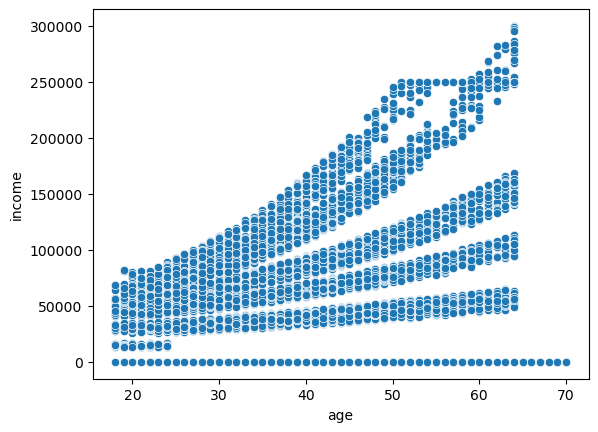

In [5]:
sns.scatterplot(data=df, x='age', y='income')

In [7]:
train_df, _ = train_test_split(df, test_size=0.3, random_state=42)
train_df = train_df[["age", "income", "family_size"]]
train_df.head()

,age,income,family_size
9069,46.0,43755,0
2603,44.0,0,3
7738,26.0,63823,1
1579,35.0,126008,1
5058,28.0,64661,2


In [9]:
model = KMeans(n_clusters=9)
model.fit(train_df)

KMeans(n_clusters=9)

In [10]:
model.cluster_centers_

array([[4.04709066e+01, 5.09670636e+03, 2.13667118e+00],
       [4.33011152e+01, 1.14903080e+05, 1.92565056e+00],
       [3.74908789e+01, 5.35295680e+04, 1.81011609e+00],
       [5.81840000e+01, 2.48712728e+05, 2.71200000e+00],
       [4.80943953e+01, 1.45509260e+05, 2.32153392e+00],
       [3.44680628e+01, 3.73343293e+04, 1.72513089e+00],
       [4.01265823e+01, 9.08133211e+04, 2.00920598e+00],
       [3.49302326e+01, 7.08569249e+04, 1.82737030e+00],
       [4.89679487e+01, 1.85448782e+05, 2.00641026e+00]])

#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

C:\Users\mmooreii\AppData\Local\Temp\ipykernel_28496\334331698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = kmeans.labels_
C:\Users\mmooreii\AppData\Local\Temp\ipykernel_28496\334331698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = kmeans.labels_
C:\Users\mmooreii\AppData\Local\Temp\ipykernel_28496\334331698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

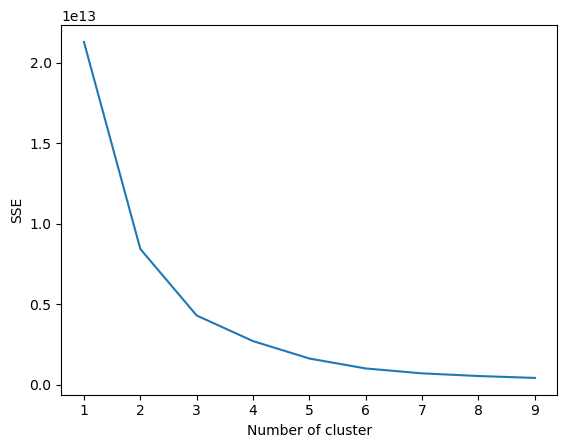

In [45]:
data = df[['age', 'income', 'family_size']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Interpret your elbow plot and/or silhouette score here.

For n_clusters = 2 The average silhouette_score is : 0.6133175671165212
For n_clusters = 3 The average silhouette_score is : 0.5643865006876102
For n_clusters = 4 The average silhouette_score is : 0.5349686137267727
For n_clusters = 5 The average silhouette_score is : 0.5917936336283761
For n_clusters = 6 The average silhouette_score is : 0.6030311245360066
For n_clusters = 7 The average silhouette_score is : 0.6040155355538752
For n_clusters = 8 The average silhouette_score is : 0.5872882245228422
For n_clusters = 9 The average silhouette_score is : 0.5844210044007517
For n_clusters = 10 The average silhouette_score is : 0.565608744054097


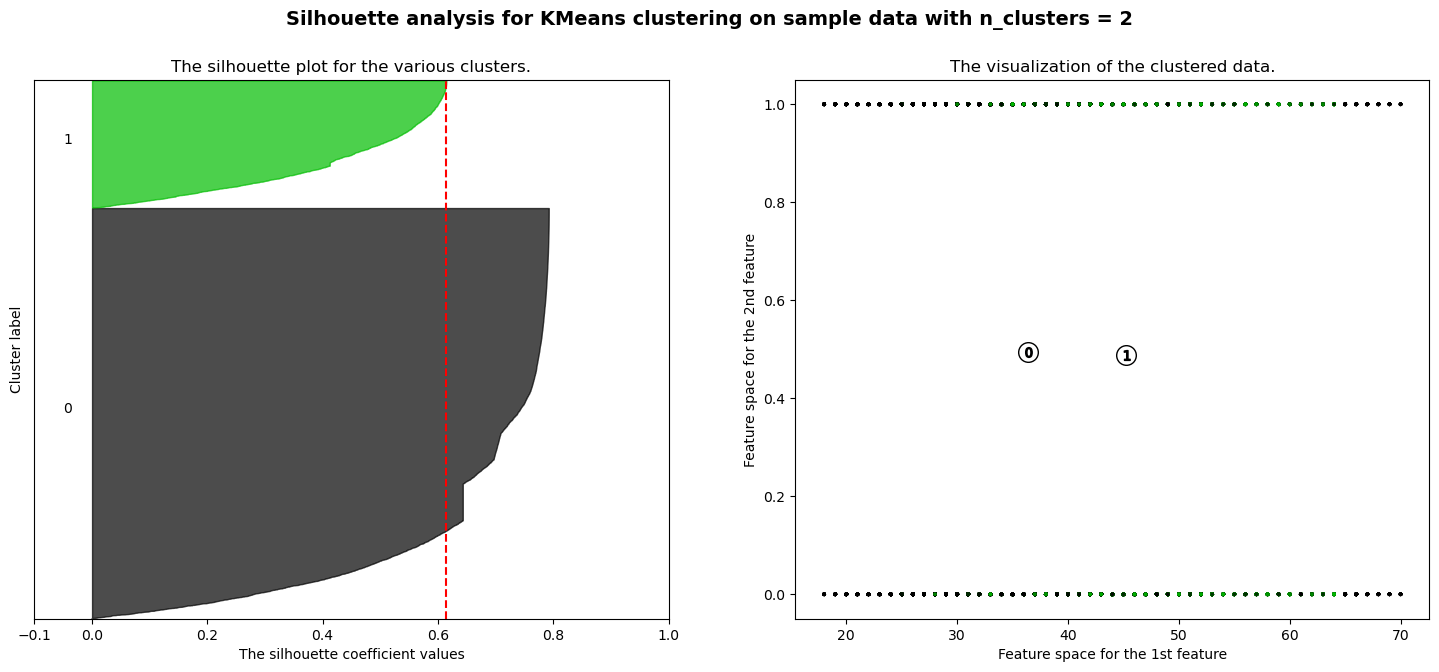

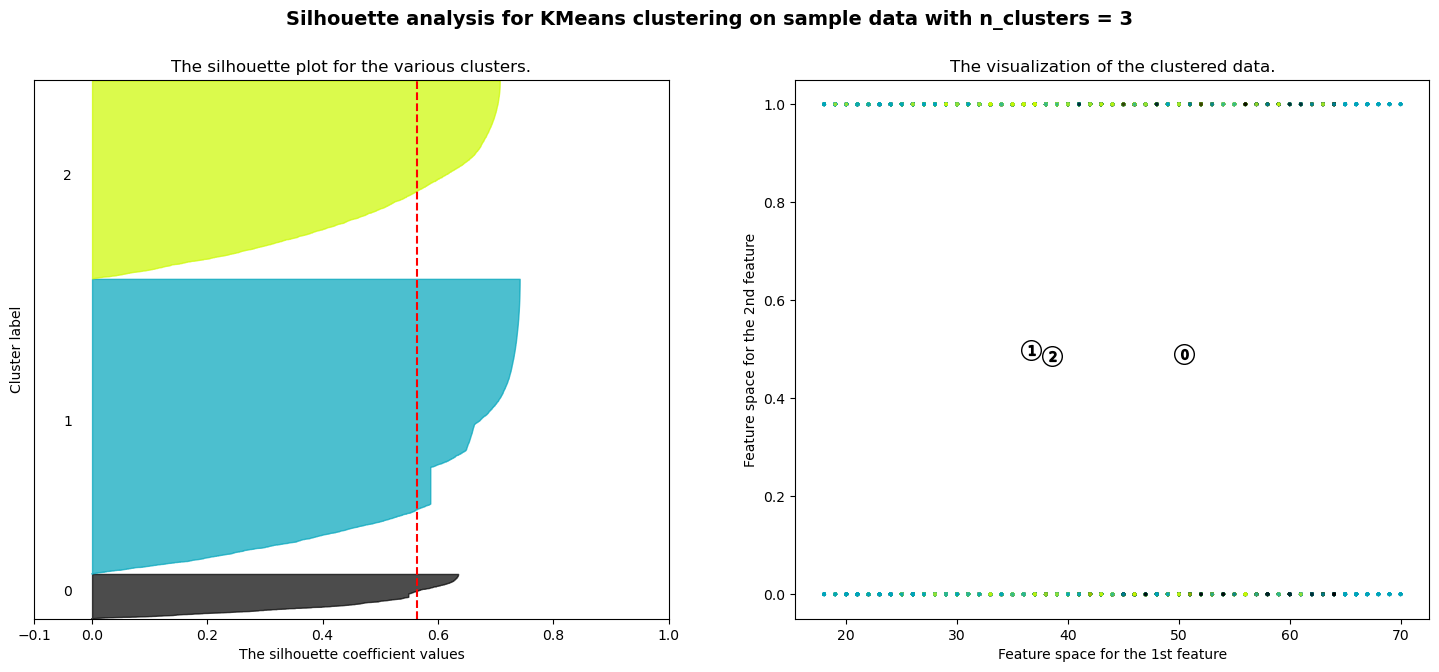

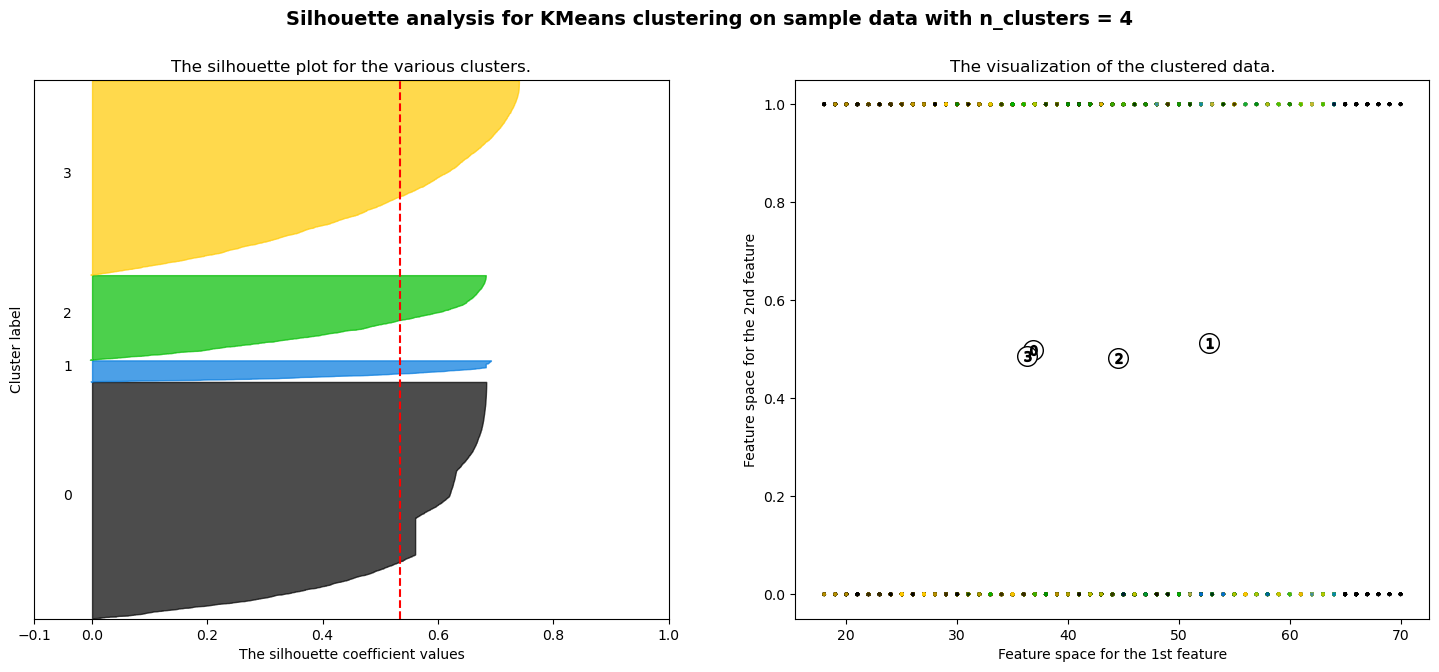

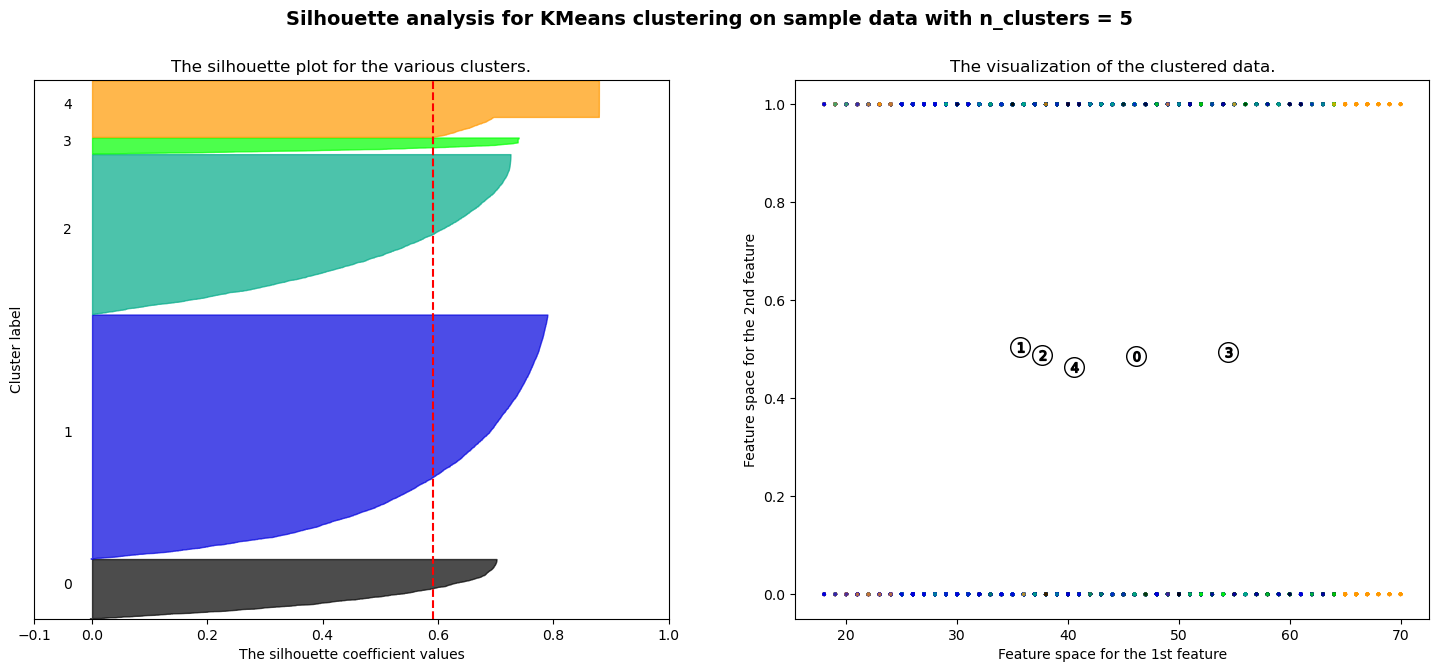

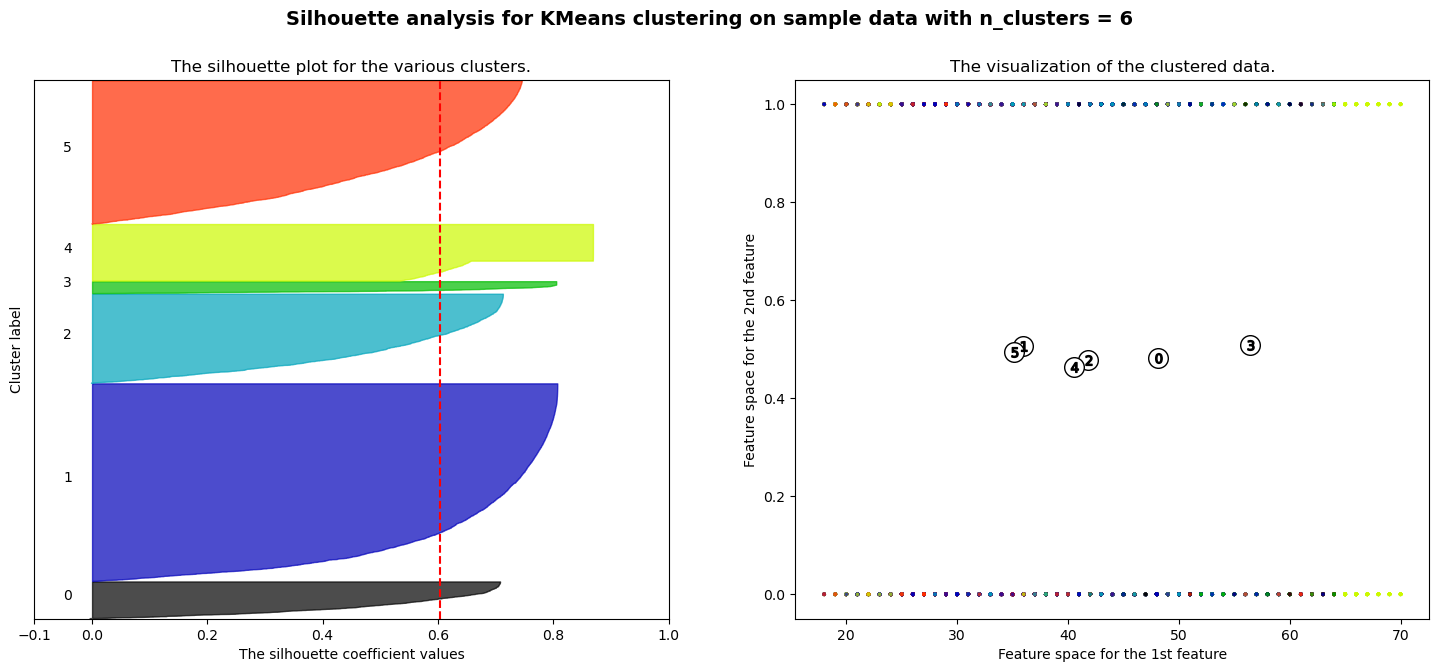

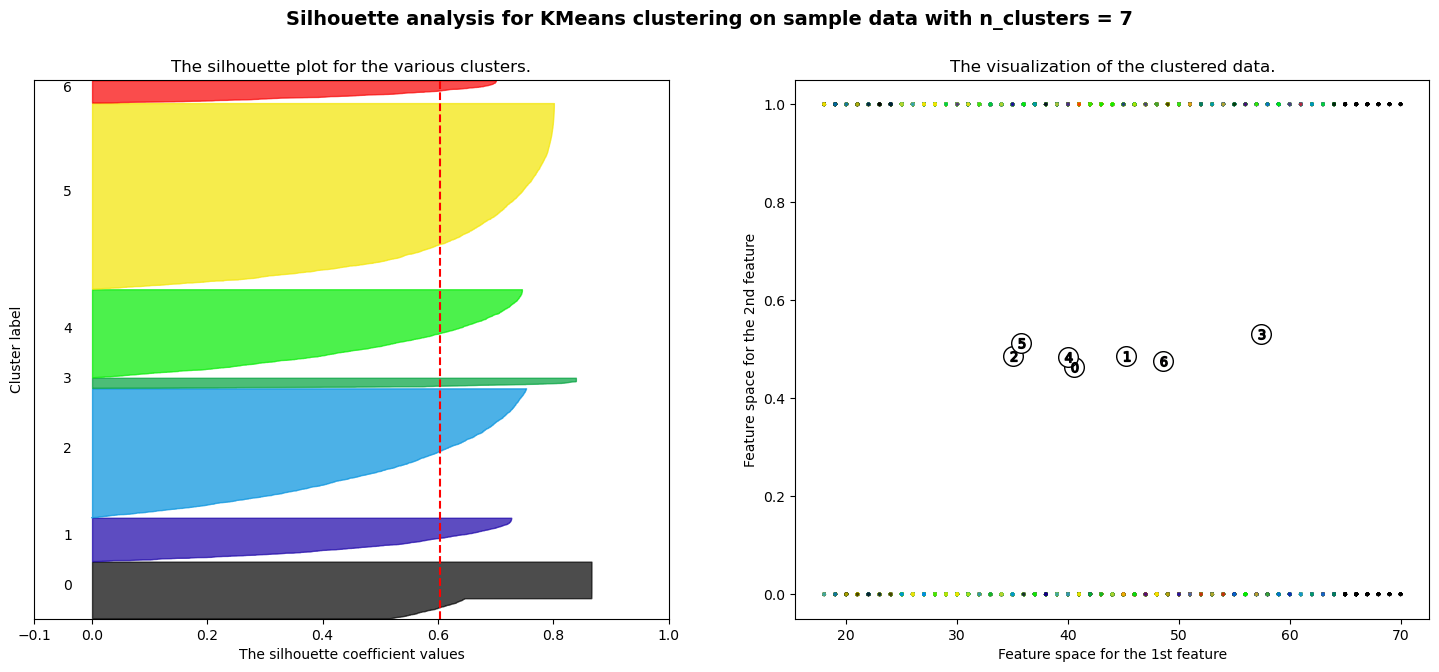

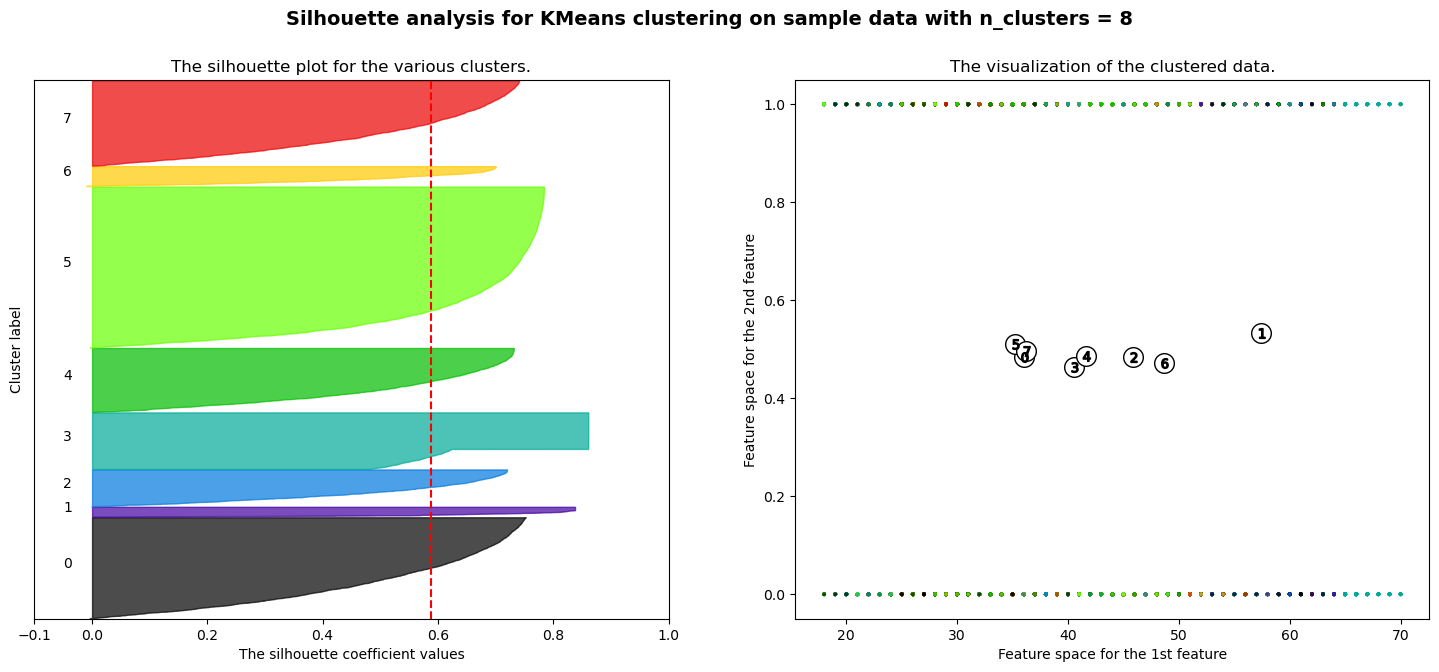

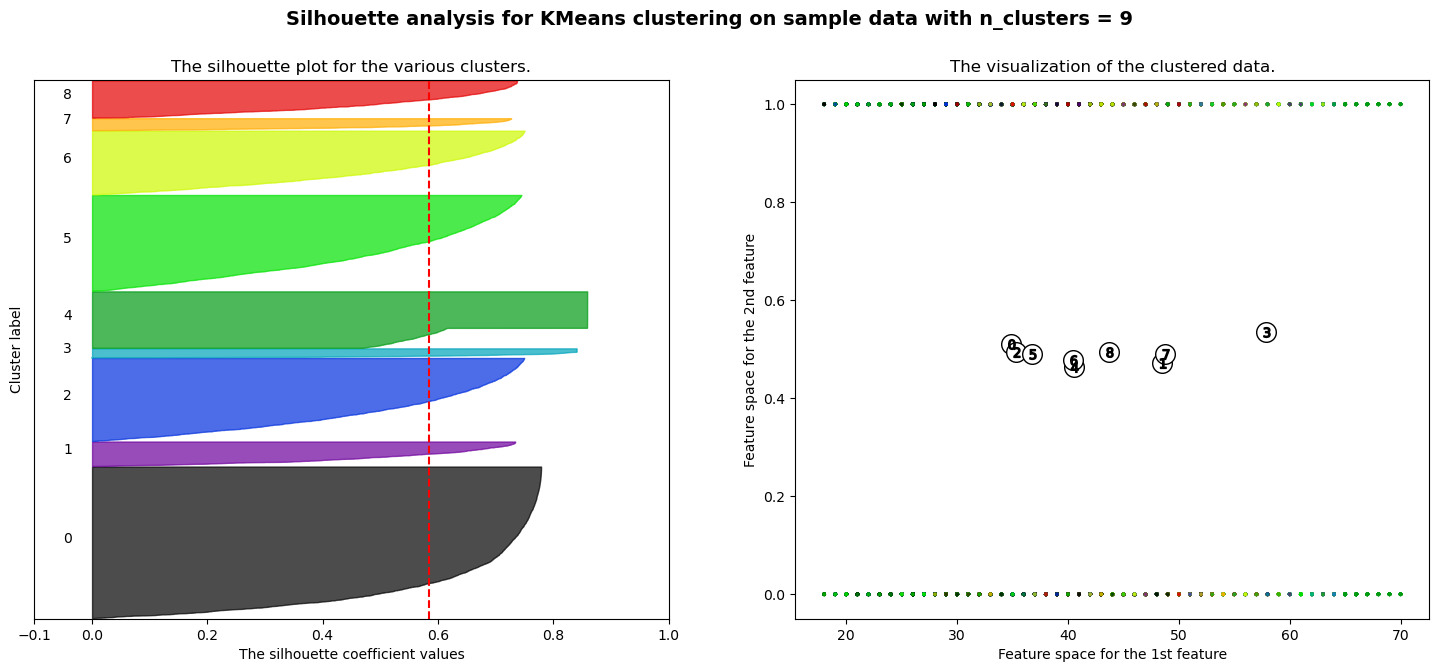

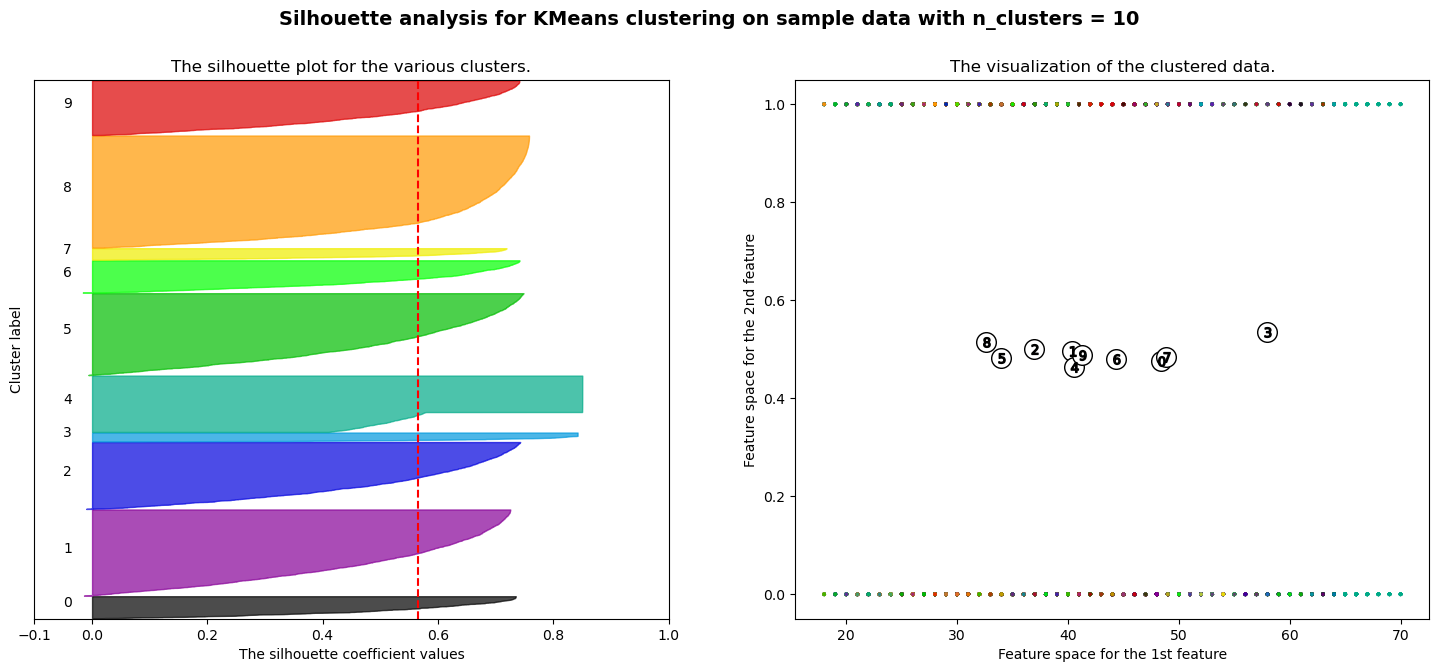

In [94]:
X = df[['age', 'sex', 'family_size', 'income', 'ad_response' ]].values

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 4], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.